In [1]:
#install and download needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import scipy
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor,BaggingRegressor,GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,KFold
from sklearn.metrics import mean_squared_error,accuracy_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.decomposition import PCA
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('PARA.csv')

In [3]:
data.shape 

(4570, 7)

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-12-27,25.65,25.93,25.299999,25.650000,16.882021,511400
1,2005-12-28,25.75,25.84,25.000000,25.049999,16.487118,821600
2,2005-12-29,25.15,25.25,24.750000,25.000000,16.454206,776100
3,2005-12-30,25.00,25.50,24.850000,25.500000,16.783300,3887900
4,2006-01-03,25.60,27.40,25.600000,26.200001,17.244013,6604500


In [5]:
data.index 

RangeIndex(start=0, stop=4570, step=1)

In [6]:
data=data.rename(columns={'Date':'date','Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'})

In [7]:
data=data.drop(columns=['Adj Close'],axis=1)

In [8]:
data['date']=pd.to_datetime(data['date'])

In [9]:
data.set_index('date', inplace=True)

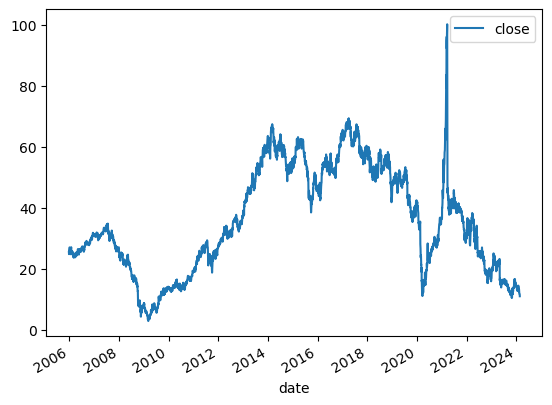

In [10]:
data.plot.line(y='close', use_index=True)
plt.savefig('PARA.png');

In [11]:
data.describe()

,open,high,low,close,volume
count,4570.000000,4570.000000,4570.000000,4570.000000,4.570000e+03
mean,35.957002,36.437678,35.461547,35.950223,8.288591e+06
std,17.345328,17.495642,17.202312,17.346400,8.651804e+06
min,3.170000,3.380000,3.060000,3.090000,5.114000e+05
25%,22.500000,23.002500,22.049999,22.582500,3.995800e+06
50%,32.695000,33.130001,32.279999,32.770000,6.527200e+06
75%,52.215001,52.779999,51.614999,52.202499,9.992025e+06
max,99.150002,101.970001,96.209999,100.339996,2.166310e+08


In [11]:
data['Tomorrow']=data['close'].shift(-1)

In [12]:
data['previousday']=data['close'].shift(1)

In [13]:
data.head() 

,open,high,low,close,volume,Tomorrow,previousday
date,,,,,,,
2005-12-27,25.65,25.93,25.299999,25.650000,511400,25.049999,NaN
2005-12-28,25.75,25.84,25.000000,25.049999,821600,25.000000,25.650000
2005-12-29,25.15,25.25,24.750000,25.000000,776100,25.500000,25.049999
2005-12-30,25.00,25.50,24.850000,25.500000,3887900,26.200001,25.000000
2006-01-03,25.60,27.40,25.600000,26.200001,6604500,26.000000,25.500000


In [14]:
train = data.iloc[:-1000]
test = data.iloc[-1000:]

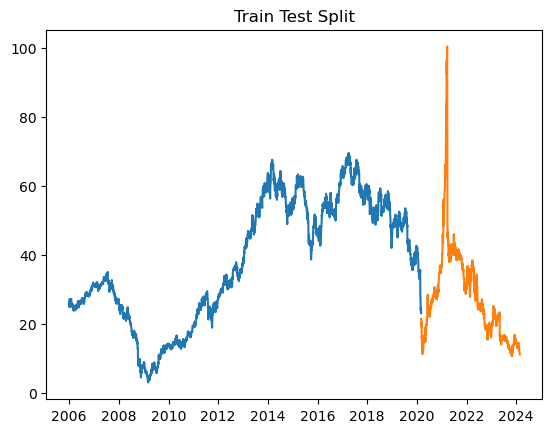

In [15]:
import matplotlib.pyplot as plt 
plt.plot(train['close'], label='train')
plt.plot(test['close'], label='test')
plt.title('Train Test Split');

In [16]:
# Utility function
def evaluate_model(model, x, y):
    """
    Utility function to print the model performance, (MAE and MAPE)
    model: Fitted model
    x:  features dataset
    y:  target values
    """
    predicted = model.predict(x) #get predictions
    mae = mean_absolute_error(y_true=y, y_pred=predicted)
    abs_errors= np.abs(np.array(predicted) - np.array(y))
    min_abs_errors= np.min(abs_errors)
    max_abs_errors= np.max(abs_errors)
    med_abs_errors= np.median(abs_errors)
    mape = mean_absolute_percentage_error(y, predicted)

    print('MAE: {:.2f}'.format(mae))
    print('MAPE: {:.2f}'.format(mape))
    print('minae: {:.2f}'.format(min_abs_errors))
    print('maxae: {:.2f}'.format(max_abs_errors))
    print('medae: {:.2f}'.format(med_abs_errors))
    print()

In [17]:
#predictors_1 = ["close", "volume", "open", "high", "low"]
predictors_2 = ["volume", "open", "high", "low"]

In [18]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on  test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors_2], train['close'])
    print(f'Performance of "{key}" on Validation and Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors_2], test['close'])





Performance of "RF Regressor" on Validation and Test set:
Test set:
****************
MAE: 0.58
MAPE: 0.01
minae: 0.00
maxae: 31.00
medae: 0.23

Performance of "xgboost" on Validation and Test set:
Test set:
****************
MAE: 0.61
MAPE: 0.02
minae: 0.00
maxae: 31.13
medae: 0.25

Performance of "Gradient Boost" on Validation and Test set:
Test set:
****************
MAE: 0.63
MAPE: 0.02
minae: 0.00
maxae: 31.19
medae: 0.27

Learning rate set to 0.325463
0:	learn: 12.3187502	total: 143ms	remaining: 14.2s
1:	learn: 8.5900717	total: 146ms	remaining: 7.15s
2:	learn: 6.0348360	total: 149ms	remaining: 4.81s
3:	learn: 4.2542861	total: 152ms	remaining: 3.64s
4:	learn: 3.0574929	total: 155ms	remaining: 2.95s
5:	learn: 2.2517427	total: 159ms	remaining: 2.49s
6:	learn: 1.7479654	total: 162ms	remaining: 2.15s
7:	learn: 1.4424888	total: 165ms	remaining: 1.9s
8:	learn: 1.2482850	total: 168ms	remaining: 1.7s
9:	learn: 1.1451071	total: 173ms	remaining: 1.55s
10:	learn: 1.0208907	total: 175ms	remainin

#### Retrain the best Model(Extreme Gradient Boosting)

In [19]:
model= GradientBoostingRegressor()
model.fit(train[predictors_2], train['close'])
pred= model.predict(test[predictors_2])

In [20]:

pred= pd.Series(pred, index=test.index)
combined_2= pd.concat([test['close'], pred],axis=1)

In [21]:
#combined_1.plot();
combined_2

,close,0
date,,
2020-03-05,21.480000,22.481617
2020-03-06,21.570000,21.809706
2020-03-09,19.170000,19.120190
2020-03-10,20.530001,19.165556
2020-03-11,19.799999,19.943555
...,...,...
2024-02-16,12.000000,12.351256
2024-02-20,11.950000,12.307630
2024-02-21,11.800000,12.307630


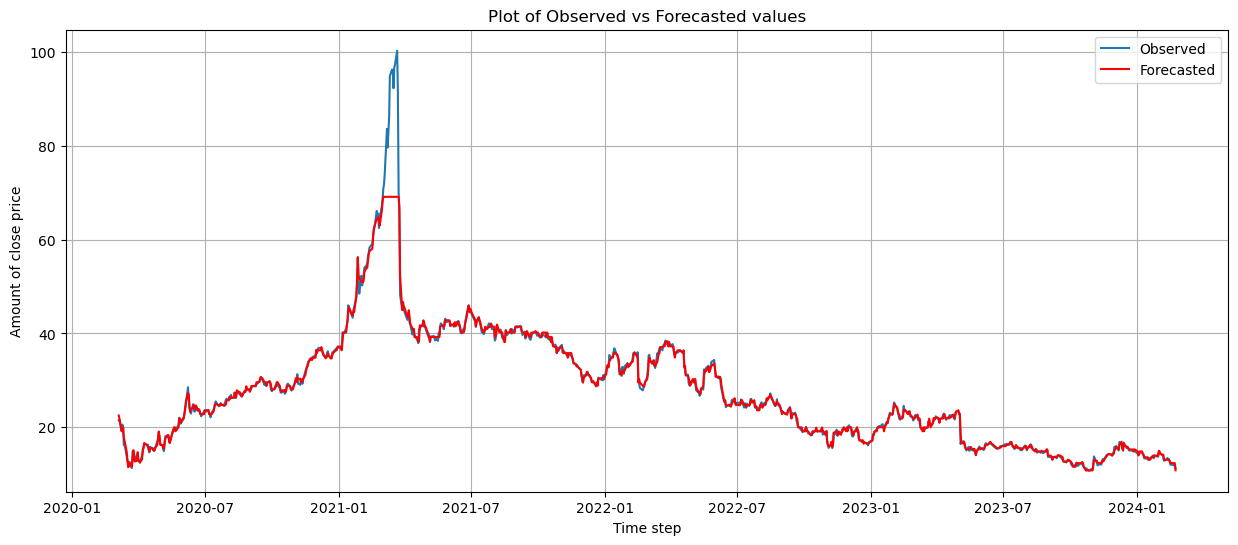

In [22]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_2['close'], label='Observed')
plt.plot(combined_2[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [23]:
#add additional predictors to the model
#calculate the mean close price in certain days and  find the ratio between today's closing price and that of the periods
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["close"] / rolling_averages["close"]
    
    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["close"]
    
    
    
    new_predictors+= [ratio_column, trend_column]

In [24]:
data['mom'] = data['close'].pct_change(12) # 12 month change

In [25]:
#Create the RSI indicator
#data['rsi' + str(n)] = talib.RSI(data['close'].values, timeperiod=horizon)
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [26]:
data['RSI']= computeRSI(data['close'], 14)

In [27]:
data.head()

,open,high,low,close,volume,Tomorrow,previousday,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,mom,RSI
date,,,,,,,,,,,,,,,,,,,
2005-12-27,25.65,25.93,25.299999,25.650000,511400,25.049999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-12-28,25.75,25.84,25.000000,25.049999,821600,25.000000,25.650000,0.988166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-12-29,25.15,25.25,24.750000,25.000000,776100,25.500000,25.049999,0.999001,50.699999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-12-30,25.00,25.50,24.850000,25.500000,3887900,26.200001,25.000000,1.009901,50.049999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03,25.60,27.40,25.600000,26.200001,6604500,26.000000,25.500000,1.013540,50.500000,1.028257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
data.shape 

(4570, 19)

In [29]:
new_data=data[new_predictors]
new_data['close']=data['close']
new_data['MOM']=data['mom']
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM
date,,,,,,,,,,,,
2005-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.650000,NaN
2005-12-28,0.988166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.049999,NaN
2005-12-29,0.999001,50.699999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,NaN
2005-12-30,1.009901,50.049999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.500000,NaN
2006-01-03,1.013540,50.500000,1.028257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.200001,NaN


In [30]:
new_data['SMA_3'] = new_data.iloc[:,10].rolling(window=3).mean()
new_data['SMA_4'] = new_data.iloc[:,10].rolling(window=4).mean()

In [31]:
new_data['CMA_4'] = new_data['close'].expanding(min_periods=4).mean()

In [32]:
new_data['EMA'] = new_data.iloc[:,10].ewm(span=40,adjust=False).mean()

In [33]:
new_data=new_data.dropna()
new_data.shape 

(3570, 16)

In [34]:
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM,SMA_3,SMA_4,CMA_4,EMA
date,,,,,,,,,,,,,,,,
2009-12-16,1.007768,28.10,1.015803,69.52,1.109283,770.23,1.661752,2139.96,0.674269,21175.049983,14.27,0.113973,14.123333,14.1075,21.168152,13.164531
2009-12-17,0.981078,28.32,0.979051,70.24,1.065805,771.85,1.595552,2146.83,0.649573,21163.669983,13.74,0.044867,14.020000,14.0275,21.160739,13.192602
2009-12-18,1.004708,28.01,0.990997,70.17,1.072741,773.50,1.605867,2152.86,0.656064,21152.359984,13.87,0.065284,13.960000,13.9825,21.153470,13.225646
2009-12-21,1.001080,27.61,0.995274,69.98,1.071911,775.77,1.604562,2159.27,0.657844,21141.229984,13.90,0.088489,13.836667,13.9450,21.146245,13.258541
2009-12-22,0.998559,27.77,0.995118,69.83,1.066660,778.05,1.595267,2165.70,0.656334,21129.629984,13.86,0.029718,13.876667,13.8425,21.138995,13.287881


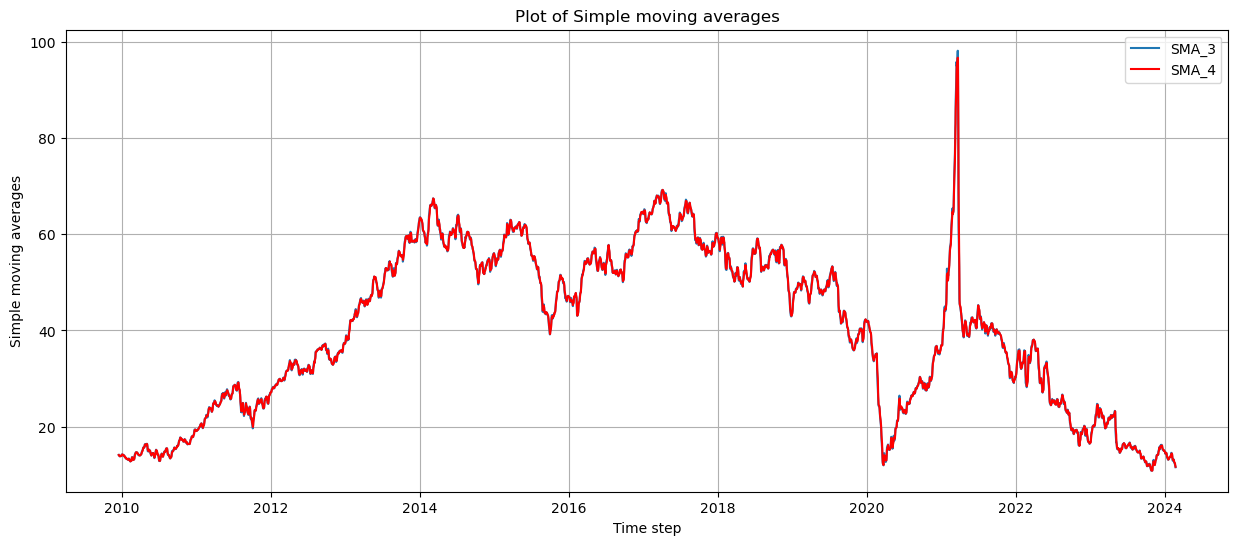

In [35]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['SMA_3'], label='SMA_3')
plt.plot(new_data['SMA_4'], color='r', label='SMA_4')
plt.title('Plot of Simple moving averages')
plt.ylabel('Simple moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

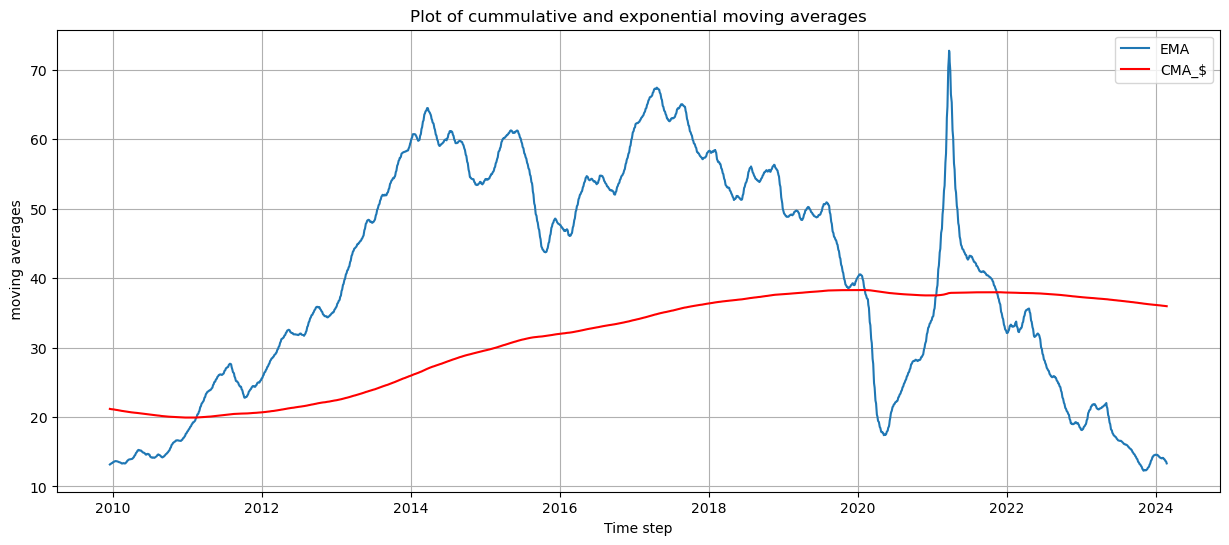

In [36]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['EMA'], label='EMA')
plt.plot(new_data['CMA_4'], color='r', label='CMA_$')
plt.title('Plot of cummulative and exponential moving averages')
plt.ylabel(' moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

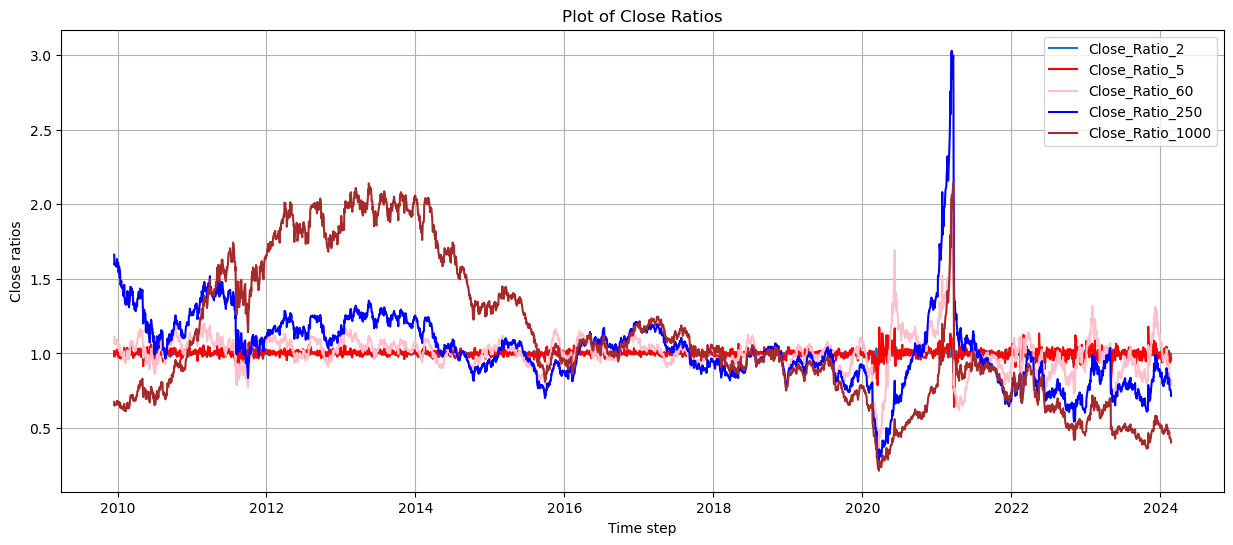

In [37]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Close_Ratio_2'], label='Close_Ratio_2')
plt.plot(new_data['Close_Ratio_5'], color='r', label='Close_Ratio_5')
plt.plot(new_data['Close_Ratio_60'], color='pink', label='Close_Ratio_60')
plt.plot(new_data['Close_Ratio_250'], color='b', label='Close_Ratio_250')
plt.plot(new_data['Close_Ratio_1000'], color='brown', label='Close_Ratio_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

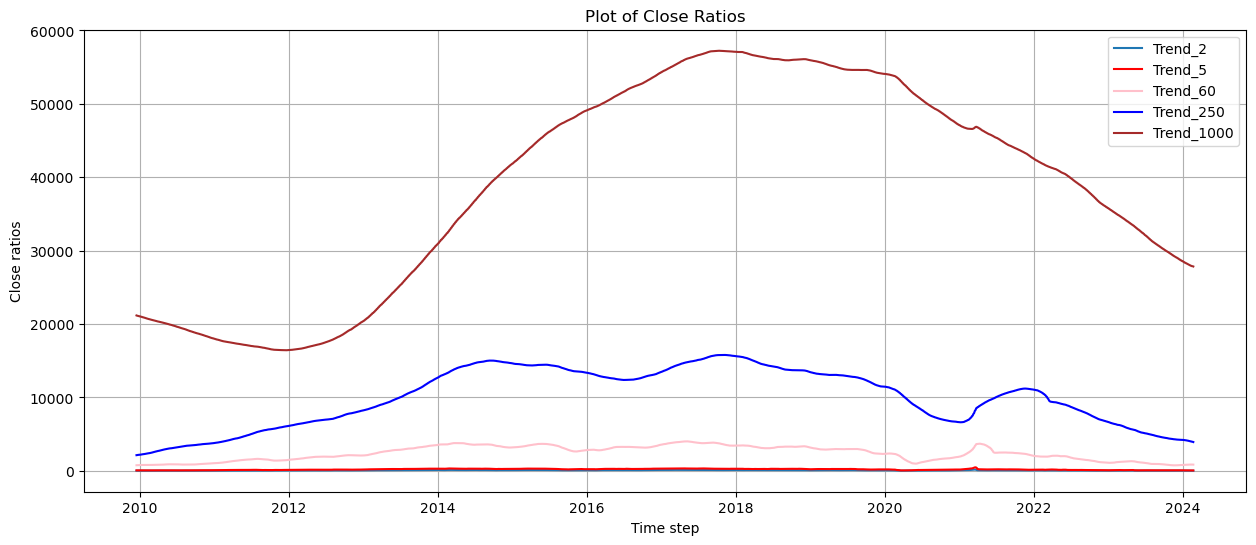

In [38]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Trend_2'], label='Trend_2')
plt.plot(new_data['Trend_5'], color='r', label='Trend_5')
plt.plot(new_data['Trend_60'], color='pink', label='Trend_60')
plt.plot(new_data['Trend_250'], color='b', label='Trend_250')
plt.plot(new_data['Trend_1000'], color='brown', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [39]:
new_data['RSI']=data['RSI']
new_data['previousday']=data['previousday']

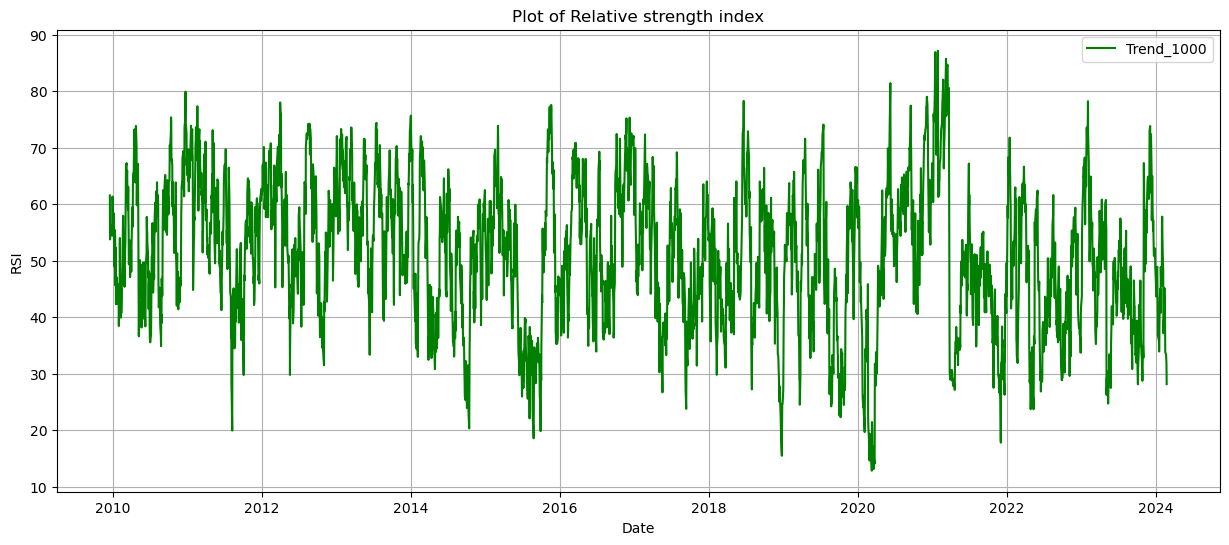

In [40]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['RSI'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Relative strength index')
plt.ylabel('RSI')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

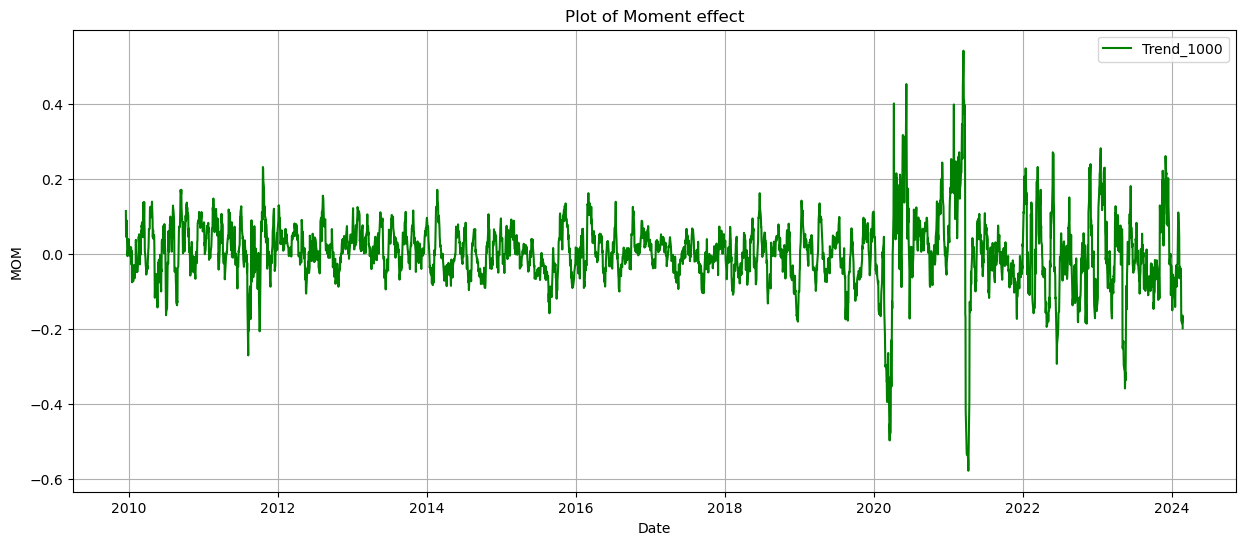

In [41]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['MOM'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Moment effect')
plt.ylabel('MOM')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [42]:
train = new_data.iloc[:-1000]
test = new_data.iloc[-1000:]

In [43]:
train.shape

(2570, 18)

In [44]:
new_data.columns

Index(['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000', 'close', 'MOM', 'SMA_3', 'SMA_4',
       'CMA_4', 'EMA', 'RSI', 'previousday'],
      dtype='object')

In [45]:
predictors= ['SMA_3','SMA_4','EMA','RSI','MOM','previousday' ] 

#### Retrain the models on the new predictors

In [46]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on Cross validation and test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors], train['close'])
    print(f'Performance of "{key}" on  Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors], test['close'])

Performance of "RF Regressor" on  Test set:
Test set:
****************
MAE: 0.84
MAPE: 0.03
minae: 0.00
maxae: 31.11
medae: 0.41

Performance of "xgboost" on  Test set:
Test set:
****************
MAE: 0.82
MAPE: 0.03
minae: 0.00
maxae: 30.96
medae: 0.40

Performance of "Gradient Boost" on  Test set:
Test set:
****************
MAE: 0.87
MAPE: 0.03
minae: 0.00
maxae: 31.10
medae: 0.42

Learning rate set to 0.308993
0:	learn: 11.0374059	total: 6.01ms	remaining: 595ms
1:	learn: 7.9087129	total: 9.51ms	remaining: 466ms
2:	learn: 5.7194655	total: 12.8ms	remaining: 416ms
3:	learn: 4.1150456	total: 18ms	remaining: 433ms
4:	learn: 3.0292160	total: 21.5ms	remaining: 409ms
5:	learn: 2.3090588	total: 25ms	remaining: 392ms
6:	learn: 1.7920030	total: 28.3ms	remaining: 376ms
7:	learn: 1.4750358	total: 35ms	remaining: 402ms
8:	learn: 1.2745284	total: 38.4ms	remaining: 388ms
9:	learn: 1.1368733	total: 41.8ms	remaining: 376ms
10:	learn: 1.0593816	total: 45.1ms	remaining: 365ms
11:	learn: 0.9998000	total

#### Improving the model

In [47]:
#model_1 = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
#n_estimators=200, min_samples_split=50, random_state=1
model_2= GradientBoostingRegressor(random_state=0)

def predict(train, test, predictors_1, model_1):
    model_1.fit(train[predictors_1], train["Target"])
    preds_1 = model_1.predict_proba(test[predictors_1])[:,1]
    preds_1[preds_1 >=.6] = 1
    preds_1[preds_1 <.6] = 0
    preds_1 = pd.Series(preds_1, index=test.index, name="Predictions_1")
    combined_1 = pd.concat([test["Target"], preds_1], axis=1)
    return combined_1 

In [48]:
def predict(train, test, predictors, model_2):
    model_2.fit(train[predictors], train["close"])
    preds_2 = model_2.predict(test[predictors])
    preds_2 = pd.Series(preds_2, index=test.index, name="Predictions_2")
    combined_2 = pd.concat([test["close"], preds_2], axis=1)
    return combined_2

In [49]:
def backtest(new_data, model_2, predictors, start=1500, step=250):
    all_predictions = []

    for i in range(start, new_data.shape[0], step):
        train = new_data.iloc[0:i].copy()
        test = new_data.iloc[i:(i+step)].copy()
        predictions_2 = predict(train, test, predictors, model_2)
        all_predictions.append(predictions_2)
    
    return pd.concat(all_predictions)

In [50]:
predictions_2 = backtest(new_data, model_2, predictors)

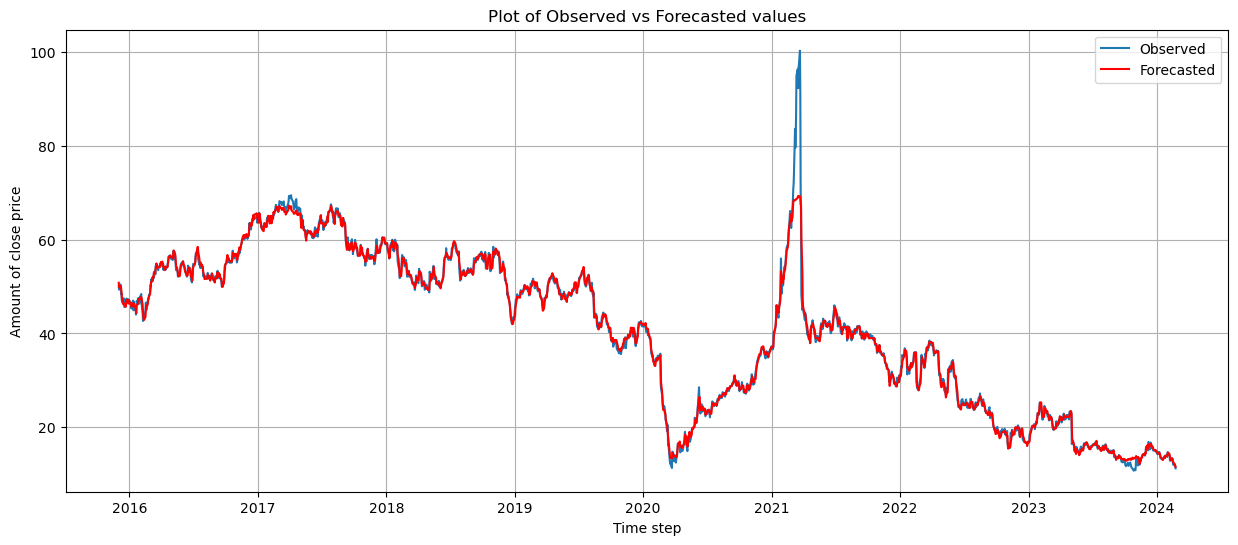

In [51]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(predictions_2['close'], label='Observed')
plt.plot(predictions_2['Predictions_2'], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [52]:
model_2.fit(train[predictors], train['close'])
prediction=model_2.predict(test[predictors])

In [53]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [54]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.029318108371063297

mean absolute  error is : 0.8691864284260274



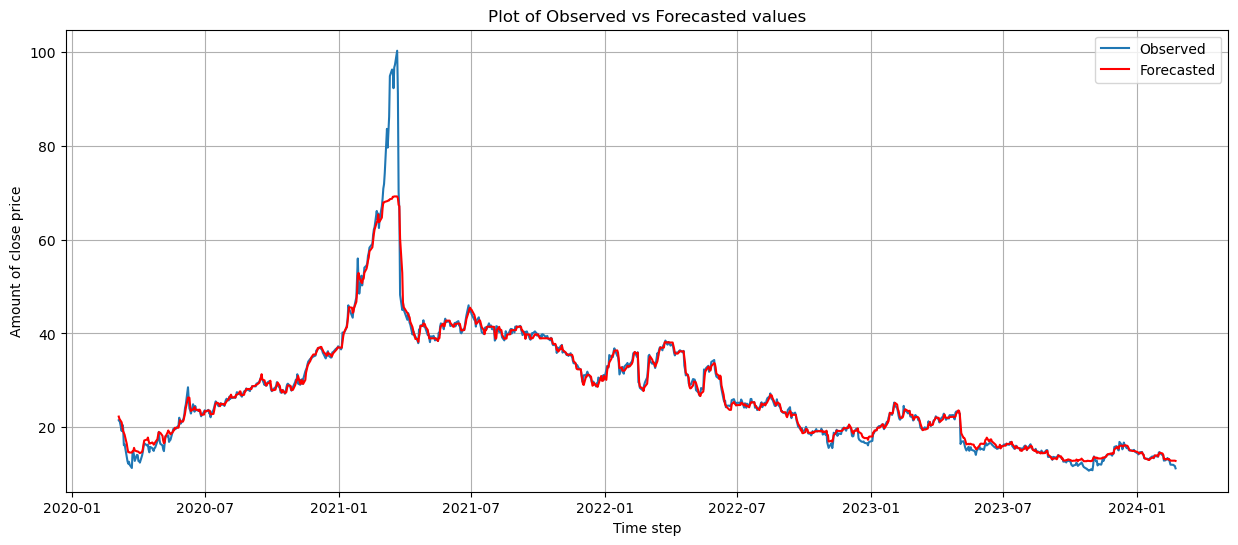

In [55]:
# Plot the test predictions and true values
pred= pd.Series(prediction, index=test.index)
plt.figure(figsize=(15,6))
plt.plot(test['close'], label='Observed')
plt.plot(pred, color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

#### Perform Hyper parameter tuning using grid searchcv

#possibe hyperparameters for random forest
hyper = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 6]
}

from sklearn.model_selection import GridSearchCV

cv_model= GridSearchCV(GradientBoostingRegressor(), param_grid=hyper)
cv_model.fit(train[predictors], train['close'])

print(cv_model.best_score_)
print(cv_model.best_estimator_)

In [56]:
model = GradientBoostingRegressor(max_depth=7, n_estimators=350,  min_samples_split=5)
model.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [57]:
grdb_mae =  mean_absolute_error(test['close'], prediction)
abs_errors= np.abs(np.array(prediction) - np.array(test['close']))
grdb_min_abs_errors= np.min(abs_errors)
grdb_max_abs_errors= np.max(abs_errors)
grdb_med_abs_errors= np.median(abs_errors)
grdb_mape = mean_absolute_percentage_error(test['close'], prediction)

In [58]:
print(f"Optimized Gradient boosting Performance Metrics \n\n \
gradientboost Mae: {grdb_mae} \n \
gradientboost minae: {grdb_min_abs_errors} \n \
gradientboost maxae: {grdb_max_abs_errors} \n \
gradientboost medae: {grdb_med_abs_errors} \n \
gradientboost Mape: {grdb_mape} \n \
 \n\n <-------------------------------------------------->\n")

Optimized Gradient boosting Performance Metrics 

 gradientboost Mae: 0.8423932975504904 
 gradientboost minae: 0.0007642314645934789 
 gradientboost maxae: 30.90521738542145 
 gradientboost medae: 0.41646009173216036 
 gradientboost Mape: 0.027701328470048966 
  

 <-------------------------------------------------->



In [59]:
pred= pd.Series(prediction, index=test.index)
combined= pd.concat([test['close'], pred],axis=1)
combined 

,close,0
date,,
2020-03-05,21.480000,22.201756
2020-03-06,21.570000,22.431407
2020-03-09,19.170000,20.742250
2020-03-10,20.530001,20.159400
2020-03-11,19.799999,19.320722
...,...,...
2024-02-16,12.000000,12.791148
2024-02-20,11.950000,12.756673
2024-02-21,11.800000,12.777361


In [60]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [61]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.027701328470048966

mean absolute  error is : 0.8423932975504904



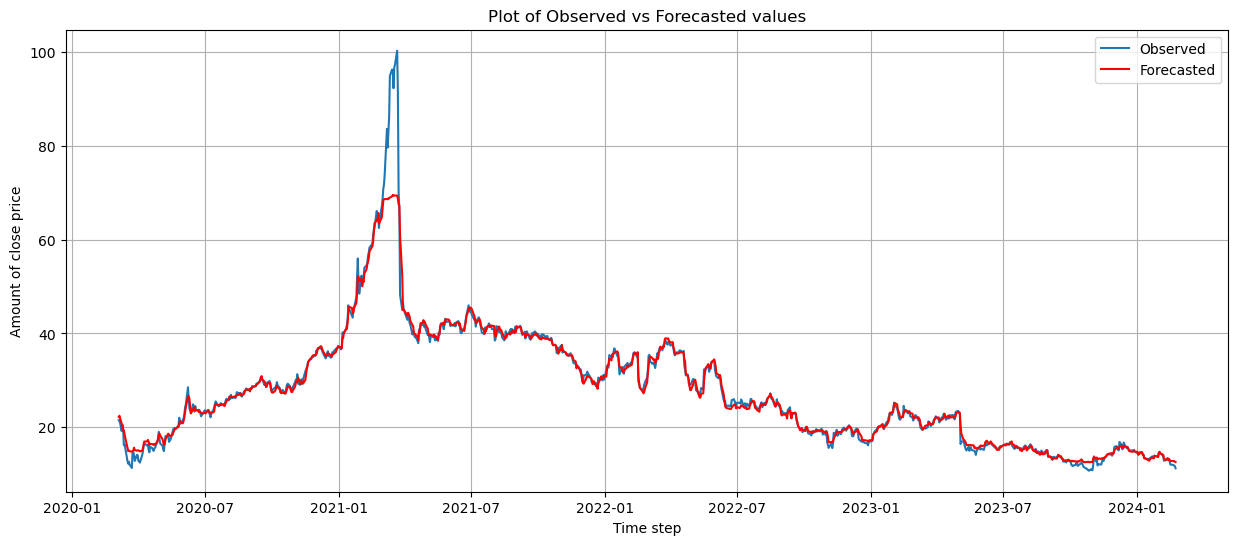

In [62]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined['close'], label='Observed')
plt.plot(combined[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

### Stacking and Bagging

In [63]:
# List of machine learning algorithms to consider
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet 
algorithms = [
    ('Linear regression', LinearRegression(), {}),
    ('Ridge', Ridge(), {}),
    ('Lasso', Lasso(), {}),
    ('Elastic Net', ElasticNet(), {}),
    #('SVM', SVC(kernel='linear', probability=True, decision_function_shape='ovr'), {}),
    ('MLP', MLPRegressor(), {})
]

# Train base models
base_models = {}
for algorithm_name, algorithm, _ in algorithms:
    print(algorithm)
    model = algorithm
    model.fit(train[predictors], train['close'])
    base_models[algorithm_name] = model

eval_metrics = ['mae', 'mape']
results = pd.DataFrame(columns=['Algorithm'] + eval_metrics)

for algorithm_name, model in base_models.items():
    y_pred = model.predict(test[predictors])
    mae= mean_absolute_error(test['close'], y_pred)
    mape =mean_absolute_percentage_error(test['close'], y_pred)

# Ensembling using Bagging with all base models
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=10, random_state=42)
bagging_model.fit(train[predictors], train['close'])
bagging_y_pred = bagging_model.predict(test[predictors])
bagging_mae = mean_absolute_error(test['close'], bagging_y_pred)
abs_errors= np.abs(np.array(bagging_y_pred) - np.array(test['close']))
bagg_min_abs_errors= np.min(abs_errors)
bagg_max_abs_errors= np.max(abs_errors)
bagg_med_abs_errors= np.median(abs_errors)
bagging_mape = mean_absolute_percentage_error(test['close'], bagging_y_pred)
print(f"Bagging Ensemble Method Performance Metrics \n\n \
bagging Mae: {bagging_mae} \n \
bagging minae: {bagg_min_abs_errors} \n \
bagging maxae: {bagg_max_abs_errors} \n \
bagging medae: {bagg_med_abs_errors} \n \
bagging Mape: {bagging_mape} \n \
 \n\n <-------------------------------------------------->\n")

# Ensembling using Stacking
meta_model = Ridge()
stacking_model = StackingRegressor(estimators=list(base_models.items()), final_estimator=meta_model)
stacking_model.fit(train[predictors], train['close'])
stacking_y_pred = stacking_model.predict(test[predictors])
stacking_mae =  mean_absolute_error(test['close'], stacking_y_pred)
abs_errors= np.abs(np.array(stacking_y_pred) - np.array(test['close']))
stack_min_abs_errors= np.min(abs_errors)
stack_max_abs_errors= np.max(abs_errors)
stack_med_abs_errors= np.median(abs_errors)
stacking_mape = mean_absolute_percentage_error(test['close'], stacking_y_pred)
print(f"Stacking Ensemble Method Performance Metrics \n\n \
stacking mae: {stacking_mae} \n \
stacking minae: {stack_min_abs_errors} \n \
stacking maxae: {stack_max_abs_errors} \n \
stacking medae: {stack_med_abs_errors} \n \
stacking mape: {stacking_mape} \n")




#print(f"Stacking F1 Score: {stacking_f1}")


LinearRegression()
Ridge()
Lasso()
ElasticNet()
MLPRegressor()
Bagging Ensemble Method Performance Metrics 

 bagging Mae: 0.8299469936 
 bagging minae: 0.000999999999995893 
 bagging maxae: 31.300996100000006 
 bagging medae: 0.40449894999999714 
 bagging Mape: 0.026917530250734994 
  

 <-------------------------------------------------->

Stacking Ensemble Method Performance Metrics 

 stacking mae: 0.5491048201341939 
 stacking minae: 0.0018372619139910285 
 stacking maxae: 10.424189085172607 
 stacking medae: 0.2706750608399835 
 stacking mape: 0.01850233361340664 



In [64]:
bagging_y_pred= pd.Series(bagging_y_pred, index=test.index)
stacking_y_pred= pd.Series(stacking_y_pred, index=test.index)

In [65]:
combined_stack= pd.concat([test['close'], stacking_y_pred],axis=1)
combined_bagg= pd.concat([test['close'], bagging_y_pred], axis=1)

In [66]:
combined_bagg.head()

,close,0
date,,
2020-03-05,21.480000,22.089
2020-03-06,21.570000,22.113
2020-03-09,19.170000,21.541
2020-03-10,20.530001,20.344
2020-03-11,19.799999,19.710


In [67]:
combined_stack.head()

,close,0
date,,
2020-03-05,21.480000,22.421279
2020-03-06,21.570000,22.578101
2020-03-09,19.170000,20.410744
2020-03-10,20.530001,21.617391
2020-03-11,19.799999,20.000475


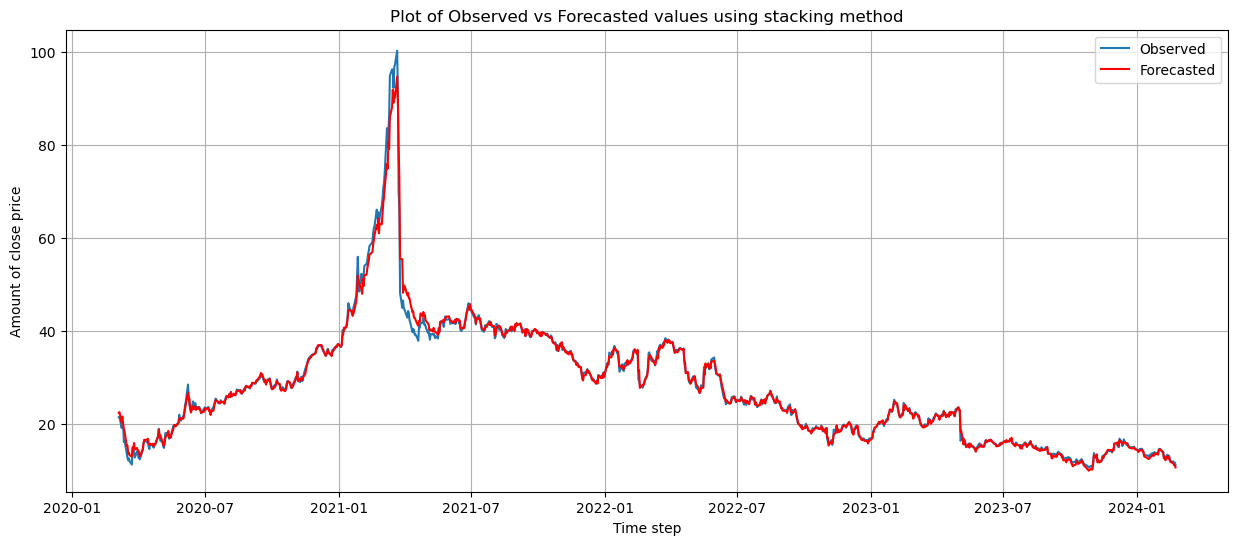

In [68]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_stack['close'], label='Observed')
plt.plot(combined_stack[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

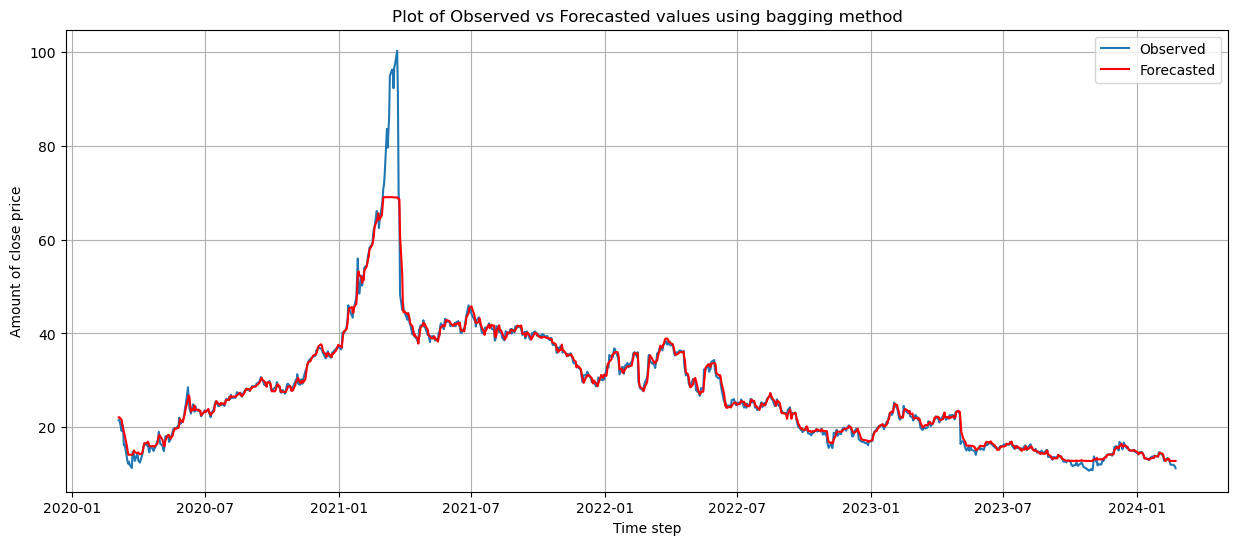

In [69]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

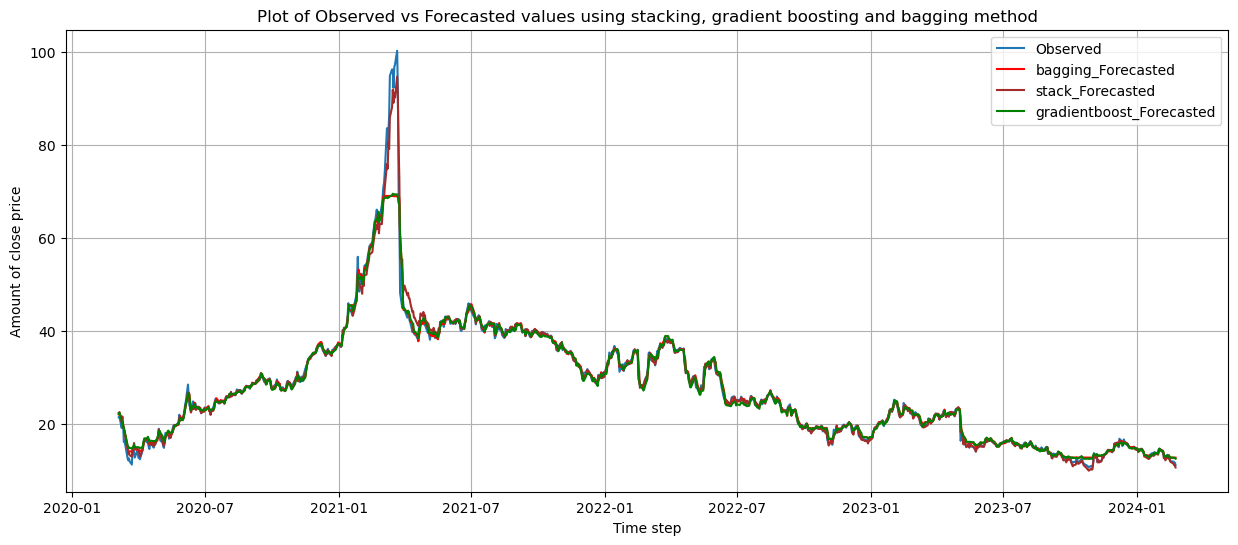

In [70]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='bagging_Forecasted')
plt.plot(combined_stack[0], color='brown', label='stack_Forecasted')
plt.plot(combined[0], color='green', label='gradientboost_Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking, gradient boosting and bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('paramountresult.png')
plt.show()

In [71]:
from prettytable import PrettyTable
import joblib
import os
# Constructing the result summary table containing the scores for each model on  test dataset.

task1_result = PrettyTable()
task1_result.field_names = ["Regressor", "MAE on Test","MAPE on Test", "MinAE on Test", "MaxAE on Test", "MedAE on Test"]
task1_result.add_row(['RF Reg', 0.84, 0.03, 0.00, 31.11, 0.41])
task1_result.add_row(['XGboost', 0.82, 0.03, 0.00, 30.96, 0.40])
task1_result.add_row(['GradientBoost', 0.87, 0.03, 0.00, 31.10, 0.42])
task1_result.add_row(['Catboost', 1.17, 0.04, 0.00, 30.65, 0.51])
task1_result.add_row(['Bagging', 0.83, 0.03, 0.00, 31.30, 0.40])
task1_result.add_row(['Stacking', 0.57, 0.02, 0.00, 10.25, 0.29])

print('Result Summary for All Regressors :')
print(task1_result)

Result Summary for All Regressors :
+---------------+-------------+--------------+---------------+---------------+---------------+
|   Regressor   | MAE on Test | MAPE on Test | MinAE on Test | MaxAE on Test | MedAE on Test |
+---------------+-------------+--------------+---------------+---------------+---------------+
|     RF Reg    |     0.84    |     0.03     |      0.0      |     31.11     |      0.41     |
|    XGboost    |     0.82    |     0.03     |      0.0      |     30.96     |      0.4      |
| GradientBoost |     0.87    |     0.03     |      0.0      |      31.1     |      0.42     |
|    Catboost   |     1.17    |     0.04     |      0.0      |     30.65     |      0.51     |
|    Bagging    |     0.83    |     0.03     |      0.0      |      31.3     |      0.4      |
|    Stacking   |     0.57    |     0.02     |      0.0      |     10.25     |      0.29     |
+---------------+-------------+--------------+---------------+---------------+---------------+
